In [1]:
#!wget http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip

In [2]:
!git clone https://github.com/niazwazir/SRCNN-Keras.git

fatal: destination path 'SRCNN-Keras' already exists and is not an empty directory.


In [3]:
cd SRCNN-Keras/

C:\Users\user\Desktop\ELECTRONICS_HANS_PAPER_COMMENTS_RESPONSE\SRCNN-Keras


In [4]:
!ls

Image_Super_Resolution.ipynb
MOUNT_SRCNN_37_PSNR.ipynb
PSNR_SSIM_MSE_SRCNN_Super_Resolution_.ipynb
SRCNNMODIFIEDPYTHON2.ipynb
SRCNN_COLOR_IMAGE_GENERATED.ipynb
SRCNN_KERAS.ipynb
SRCNN_KERAS_2nd.ipynb
SRCNN_KERAS_IN_Python3.ipynb
SRCNN_KERAS_IN_Python3_Curves.ipynb
baby_GT.bmp
baby_x2_GT.png
bird_GT.bmp
butterfly_GT.bmp
head_GT.bmp
prepare_data.py
project.gif
subpixel.py
text
woman_GT.bmp
yang91


In [5]:
!unzip yang91.zip

unzip:  cannot find or open yang91.zip, yang91.zip.zip or yang91.zip.ZIP.


In [6]:
!ls

Image_Super_Resolution.ipynb
MOUNT_SRCNN_37_PSNR.ipynb
PSNR_SSIM_MSE_SRCNN_Super_Resolution_.ipynb
SRCNNMODIFIEDPYTHON2.ipynb
SRCNN_COLOR_IMAGE_GENERATED.ipynb
SRCNN_KERAS.ipynb
SRCNN_KERAS_2nd.ipynb
SRCNN_KERAS_IN_Python3.ipynb
SRCNN_KERAS_IN_Python3_Curves.ipynb
baby_GT.bmp
baby_x2_GT.png
bird_GT.bmp
butterfly_GT.bmp
head_GT.bmp
prepare_data.py
project.gif
subpixel.py
text
woman_GT.bmp
yang91


In [7]:
!rm -r *.zip

rm: cannot remove '*.zip': No such file or directory


In [8]:
!ls

Image_Super_Resolution.ipynb
MOUNT_SRCNN_37_PSNR.ipynb
PSNR_SSIM_MSE_SRCNN_Super_Resolution_.ipynb
SRCNNMODIFIEDPYTHON2.ipynb
SRCNN_COLOR_IMAGE_GENERATED.ipynb
SRCNN_KERAS.ipynb
SRCNN_KERAS_2nd.ipynb
SRCNN_KERAS_IN_Python3.ipynb
SRCNN_KERAS_IN_Python3_Curves.ipynb
baby_GT.bmp
baby_x2_GT.png
bird_GT.bmp
butterfly_GT.bmp
head_GT.bmp
prepare_data.py
project.gif
subpixel.py
text
woman_GT.bmp
yang91


In [9]:
cd ..

C:\Users\user\Desktop\ELECTRONICS_HANS_PAPER_COMMENTS_RESPONSE


In [10]:
!ls

1REVIEWERCOMMENTSRESPONSE.docx
20_BLOCK_MODEL_FOR_IMAGE_SR.ipynb
2REVIEWERCOMMENTSRESPONSE.docx
3REVIEWERCOMMENTSRESPONSE.docx
4REVIEWERCOMMENTSRESPONSE.docx
DEEP_BRANCH.ipynb
HANS1
HANS_PAPER
INITIAL_ROUGH_MODEL-Copy1.ipynb
INITIAL_ROUGH_MODEL.ipynb
LINK.txt
PRELU_ACTIVATION_FUNCTION.ipynb
SRCNN-Keras
best_model_improved.h5
electronics-10-02072.pdf
electronics-1466697.docx
model.png
model2_FCN_FSRCNN.h5
~$EVIEWERCOMMENTSRESPONSE.docx
~$ectronics-1466697.docx


In [11]:
!unzip "DIV2K_train_HR.zip"

unzip:  cannot find or open DIV2K_train_HR.zip, DIV2K_train_HR.zip.zip or DIV2K_train_HR.zip.ZIP.


In [12]:
!rm -r *.zip

rm: cannot remove '*.zip': No such file or directory


In [13]:
!ls

1REVIEWERCOMMENTSRESPONSE.docx
20_BLOCK_MODEL_FOR_IMAGE_SR.ipynb
2REVIEWERCOMMENTSRESPONSE.docx
3REVIEWERCOMMENTSRESPONSE.docx
4REVIEWERCOMMENTSRESPONSE.docx
DEEP_BRANCH.ipynb
HANS1
HANS_PAPER
INITIAL_ROUGH_MODEL-Copy1.ipynb
INITIAL_ROUGH_MODEL.ipynb
LINK.txt
PRELU_ACTIVATION_FUNCTION.ipynb
SRCNN-Keras
best_model_improved.h5
electronics-10-02072.pdf
electronics-1466697.docx
model.png
model2_FCN_FSRCNN.h5
~$EVIEWERCOMMENTSRESPONSE.docx
~$ectronics-1466697.docx


In [14]:
DATADIR = "SRCNN-Keras/yang91"
DATADIR2 = "SRCNN-Keras/yang91"
#DATADIR2 = "DIV2K_train_HR"

In [15]:
import os
import cv2
import keras
import numpy as np
import tensorflow as tf
#from google.colab.patches import cv2_imshow
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, BatchNormalization, Input,Conv2DTranspose, add, Activation, LeakyReLU

In [16]:
scale = 2
req_size = 20
inp_size = int(req_size/scale)
stride = 15

X=[]
labels=[]

for filera in os.listdir(DATADIR):
    readpath = os.path.join(DATADIR,filera)
    img = cv2.imread(readpath)
    img = np.asarray(img)
    shapes = img.shape
    for i in range(0, shapes[0]-req_size+1, stride):
        for j in range(0, shapes[1]-req_size+1,stride):
            subimage_HR = img[i:i+req_size, j:j+req_size]
            #cv2_imshow(subimage_HR)
            subimage_LR = cv2.resize(subimage_HR,(inp_size,inp_size))
            X.append(subimage_LR)
            labels.append(subimage_HR)

counta=0
for filera in os.listdir(DATADIR2):
    counta=counta+1
    if(counta==300):
        break
        readpath = os.path.join(DATADIR2,filera)
        img = cv2.imread(readpath)
        img = np.asarray(img)
        shapes = img.shape
        for i in range(0, shapes[0]-req_size+1, stride):
            for j in range(0, shapes[1]-req_size+1,stride):
                subimage_HR = img[i:i+req_size, j:j+req_size]
                #cv2_imshow(subimage_HR)
                subimage_LR = cv2.resize(subimage_HR,(inp_size,inp_size))
                X.append(subimage_LR)
                labels.append(subimage_HR)

In [17]:
X = np.asarray(X)
labels = np.asarray(labels)
print(labels.shape)
print(X.shape)

(18849, 20, 20, 3)
(18849, 10, 10, 3)


In [18]:
alpha = 0.85
def basic_mse(y_true, y_pred):
    pred = tf.image.sobel_edges(y_pred)
    true = tf.image.sobel_edges(y_true)
    lossmse = tf.reduce_mean(tf.square(y_pred-y_true))
    lossedge = tf.reduce_mean(tf.square(pred-true))
    return alpha*lossmse + (1-alpha)*lossedge

In [19]:
from tensorflow.keras.layers import Input, Conv2D, Activation, SeparableConv2D
from tensorflow.keras.layers import PReLU

In [20]:
from keras.layers.advanced_activations import PReLU

In [21]:
import tensorflow as tf
import keras
import numpy as np
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Conv2D, Activation, Input,Conv2DTranspose,MaxPooling2D, Concatenate,AveragePooling2D,GlobalMaxPooling2D
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.layers import Input, Conv2D, Activation, SeparableConv2D
from keras.layers.advanced_activations import PReLU
from tensorflow.keras.layers import Input, Conv2D, Activation, UpSampling2D

In [22]:
def Res_block1():
    _input = Input(shape=(None, None, 3))
    DC = SeparableConv2D(3,(3,3),padding='SAME')(_input)
    PRS1 = PReLU(shared_axes=[1,2])(DC)
    DC1 = SeparableConv2D(3,(1,1),padding='SAME')(PRS1)
    PRS2 = PReLU(shared_axes=[1,2])(DC1)
    #DC2 = SeparableConv2D(3,(1,1),padding='SAME')(PRS2)
    #PRS3 = PReLU(shared_axes=[1,2])(DC2)
    Shallow = Model(inputs=_input, outputs=PRS2)
    return Shallow
model = Res_block1()

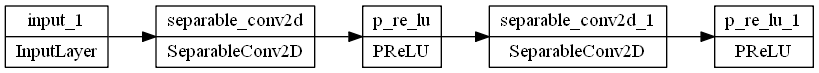

In [23]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False, show_layer_names=True, rankdir='LR', expand_nested=False, dpi=96
)

In [24]:
def Res_block2():
    _input = Input(shape=(None, None, 3))
    DC = SeparableConv2D(3,(3,3),padding='SAME')(_input)
    PRS1 = PReLU(shared_axes=[1,2])(DC)
    DC1 = SeparableConv2D(32,(1,1),padding='SAME')(PRS1)
    PRS2 = PReLU(shared_axes=[1,2])(DC1)
    DC2 = SeparableConv2D(3,(1,1),padding='SAME')(PRS2)
    PRS3 = PReLU(shared_axes=[1,2])(DC2)
    Shallow = Model(inputs=_input, outputs=PRS3)
    return Shallow
model = Res_block2()

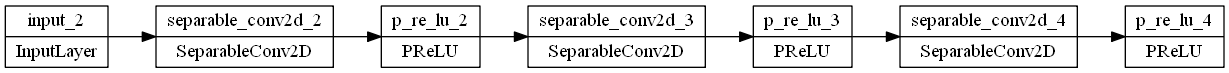

In [25]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False, show_layer_names=True, rankdir='LR', expand_nested=False, dpi=96
)

In [26]:
def Res_block3():
    _input = Input(shape=(None, None, 3))
    DC = SeparableConv2D(3,(3,3),padding='SAME')(_input)
    PRS1 = PReLU(shared_axes=[1,2])(DC)
    DC1 = SeparableConv2D(32,(1,1),padding='SAME')(PRS1)
    PRS2 = PReLU(shared_axes=[1,2])(DC1)
    DC2 = SeparableConv2D(3,(1,1),padding='SAME')(PRS2)
    PRS3 = PReLU(shared_axes=[1,2])(DC2)
    Shallow = Model(inputs=_input, outputs=PRS3)
    return Shallow
model = Res_block3()

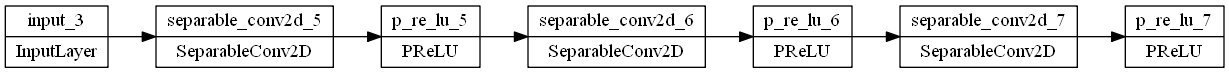

In [27]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False, show_layer_names=True, rankdir='LR', expand_nested=False, dpi=96
)

In [28]:
inputlayer = tf.keras.layers.Input(shape=(None,None,3))
####DENSE_BRANCH
C1 = Conv2D(3, (3,3), padding="same")(inputlayer)
L1 = LeakyReLU(alpha=0.2)(C1)
C2 = Conv2D(3, (3,3),padding="same")(L1)
L2 = LeakyReLU(alpha=0.2)(C2)
B1 = Res_block1()(L2)
sum1 = add(inputs=[L2,B1])
B2 = Res_block1()(sum1)
sum2 = add(inputs=[sum1,L2,B2])
B3 = Res_block1()(sum2)
sum3 = add(inputs=[sum1,sum2,L2,B3])
B4 = Res_block1()(sum3)
sum4 = add(inputs=[sum1,sum2,sum3,L2,B4])
C3 = Conv2D(3, (3,3),padding="same")(sum4)
L3 = LeakyReLU(alpha=0.2)(C3)
y1 = Conv2DTranspose(3,(9,9), strides = (scale,scale), padding="same",activation=None)(L3)
####DEEP_BRANCH
C_1 = Conv2D(3, (3,3), padding="same")(inputlayer)
L_1 = LeakyReLU(alpha=0.2)(C_1)
C_2 = Conv2D(3, (3,3),padding="same")(L_1)
L_2 = LeakyReLU(alpha=0.2)(C_2)
B_1 = Res_block1()(L_2)
sum_1 = add(inputs=[L_2,B_1])
B_2 = Res_block1()(sum_1)
sum_2 = add(inputs=[sum_1,B_2])
B_3 = Res_block1()(sum_2)
sum_3 = add(inputs=[sum_2,B_3])
B_4 = Res_block1()(sum_3)
sum_4 = add(inputs=[sum_3,B_4])
C_3 = Conv2D(3, (3,3),padding="same")(sum_4)
L_3 = LeakyReLU(alpha=0.2)(C_3)
y2 = Conv2DTranspose(3,(9,9), strides = (scale,scale), padding="same",activation=None)(L_3)
####SHALLOW_BRANCH
C_1_1 = Conv2D(3, (3,3), padding="same")(inputlayer)
L_1_1 = LeakyReLU(alpha=0.2)(C_1_1)
C_2_2 = Conv2D(3, (1,1),padding="same")(L_1_1)
L_2_2 = LeakyReLU(alpha=0.2)(C_2_2)
y3 = Conv2DTranspose(3,(9,9), strides = (scale,scale), padding="same",activation=None)(L_2_2)
C_2_3 = Conv2D(3, (1,1),padding="same")(y3)
L_2_3 = LeakyReLU(alpha=0.2)(C_2_3)


Concat1  = tf.keras.layers.concatenate([y1,y2,y3],axis=-1)
CF = Conv2D(3,(1, 1), padding="same")(Concat1)
LF = LeakyReLU(alpha=0.1)(CF)
y = Conv2DTranspose(3,(9,9), strides = (scale,scale), padding="same",activation=None)(LF)
CL = Conv2D(3,(1, 1), padding="same")(Concat1)
LL = LeakyReLU(alpha=0.1)(CL)
model = Model(inputs=inputlayer , outputs = LL)
model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d (Conv2D)                (None, None, None,   84          ['input_4[0][0]']                
                                3)                                                                
                                                                                                  
 conv2d_3 (Conv2D)              (None, None, None,   84          ['input_4[0][0]']                
                                3)                                                         

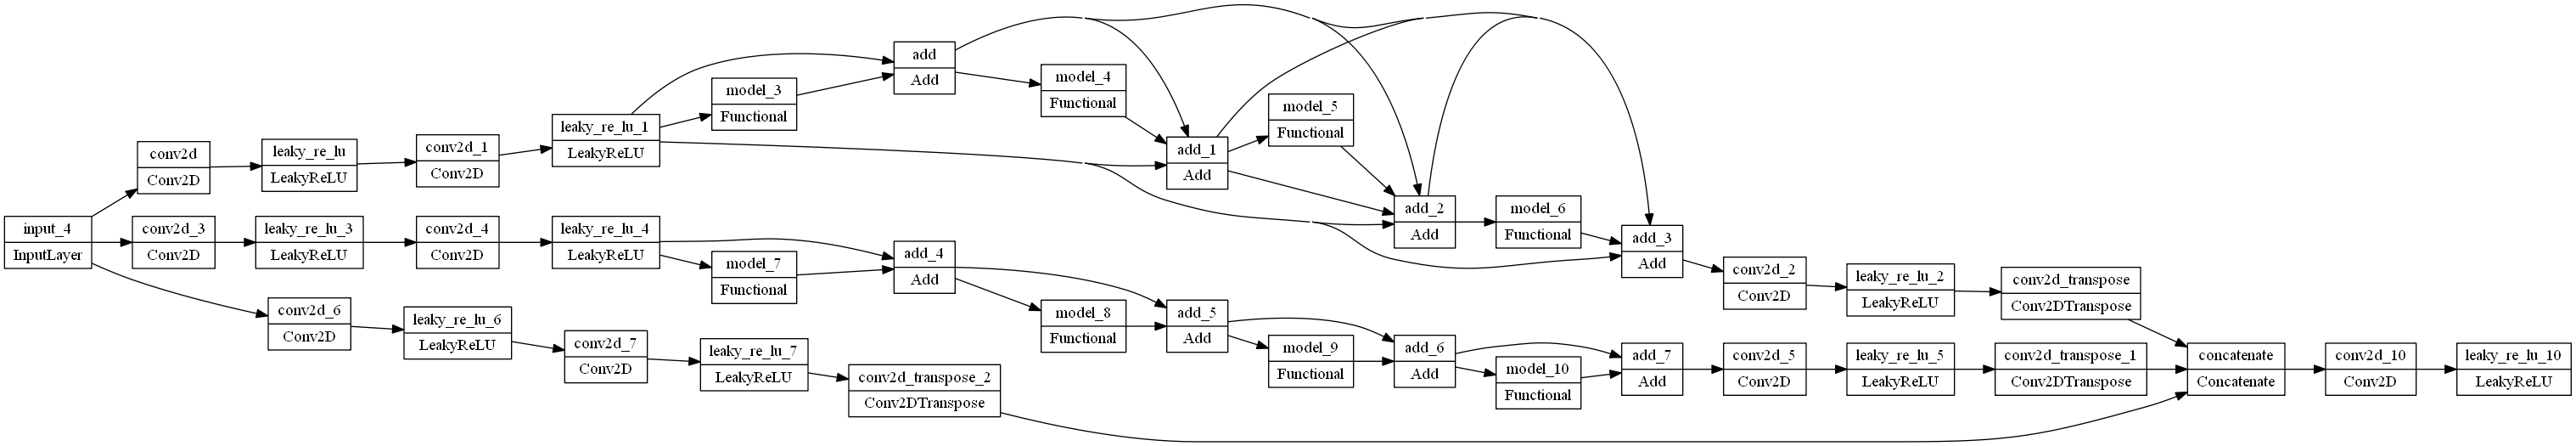

In [29]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False, show_layer_names=True, rankdir='LR', expand_nested=False, dpi=96
)

In [30]:
model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])

In [31]:
checkpoint = ModelCheckpoint('best_model_improved.h5',  # model filename
                             monitor='val_loss', # quantity to monitor
                             verbose=0, # verbosity - 0 or 1
                             save_best_only= True, # The latest best model will not be overwritten
                             mode='auto') # The decision to overwrite model is made 
                                          # automatically depending on the quantity to monitor

In [38]:
history = model.fit(X,labels,batch_size=32,shuffle=True,validation_split=0.01 ,epochs=500,callbacks=[checkpoint],
                    verbose=1 )

Epoch 1/500
584/584 [==============================] - 16s 27ms/step - loss: 80.4186 - accuracy: 0.9657 - val_loss: 19.3315 - val_accuracy: 1.0000
Epoch 2/500
584/584 [==============================] - 15s 26ms/step - loss: 80.2792 - accuracy: 0.9654 - val_loss: 19.9786 - val_accuracy: 1.0000
Epoch 3/500
584/584 [==============================] - 15s 26ms/step - loss: 80.4137 - accuracy: 0.9640 - val_loss: 19.4981 - val_accuracy: 1.0000
Epoch 4/500
584/584 [==============================] - 15s 26ms/step - loss: 79.9907 - accuracy: 0.9668 - val_loss: 19.0924 - val_accuracy: 1.0000
Epoch 5/500
  1/584 [..............................] - ETA: 21s - loss: 64.1704 - accuracy: 0.9839

C:\Users\user\anaconda3\envs\cuda_tf\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


584/584 [==============================] - 16s 27ms/step - loss: 80.5665 - accuracy: 0.9638 - val_loss: 19.4332 - val_accuracy: 1.0000
Epoch 6/500
584/584 [==============================] - 15s 26ms/step - loss: 79.9794 - accuracy: 0.9667 - val_loss: 20.5568 - val_accuracy: 1.0000
Epoch 7/500
584/584 [==============================] - 15s 26ms/step - loss: 80.2078 - accuracy: 0.9657 - val_loss: 20.6534 - val_accuracy: 1.0000
Epoch 8/500
584/584 [==============================] - 15s 25ms/step - loss: 80.1382 - accuracy: 0.9642 - val_loss: 21.8663 - val_accuracy: 1.0000s - loss: 
Epoch 9/500
584/584 [==============================] - 15s 27ms/step - loss: 79.9047 - accuracy: 0.9669 - val_loss: 20.1108 - val_accuracy: 1.0000
Epoch 10/500
584/584 [==============================] - ETA: 0s - loss: 80.0382 - accuracy: 0.9654- ETA: 4s - loss: 79.31 - ETA: 3s - loss: 79.1929 - accur - ETA: 2s - loss: 79.7314 - ETA: 1s - loss: 79.7688 - accuracy:  - ETA: 1s - loss: 79.8421 - accuracy: - ETA: 0

584/584 [==============================] - 16s 27ms/step - loss: 79.2201 - accuracy: 0.9659 - val_loss: 18.8647 - val_accuracy: 1.0000
Epoch 57/500
584/584 [==============================] - 15s 26ms/step - loss: 79.1535 - accuracy: 0.9660 - val_loss: 22.5611 - val_accuracy: 1.0000
Epoch 58/500
584/584 [==============================] - 15s 25ms/step - loss: 79.0584 - accuracy: 0.9668 - val_loss: 18.5184 - val_accuracy: 1.0000
Epoch 59/500
584/584 [==============================] - 15s 26ms/step - loss: 79.2064 - accuracy: 0.9656 - val_loss: 19.5239 - val_accuracy: 1.0000
Epoch 60/500
584/584 [==============================] - 16s 27ms/step - loss: 79.0937 - accuracy: 0.9661 - val_loss: 19.0375 - val_accuracy: 1.0000TA: 1s - loss: 
Epoch 61/500
584/584 [==============================] - 15s 26ms/step - loss: 79.0890 - accuracy: 0.9657 - val_loss: 19.6514 - val_accuracy: 1.0000: 78.5798 - accuracy: 0.96 - ETA: 6s - loss:  - ETA: 4s - loss: 78.2879 - a - ETA: 0s - loss: 78.8277 - 
Epoch 

584/584 [==============================] - 15s 26ms/step - loss: 78.1833 - accuracy: 0.9658 - val_loss: 19.9657 - val_accuracy: 1.0000
Epoch 108/500
584/584 [==============================] - 15s 26ms/step - loss: 78.0259 - accuracy: 0.9662 - val_loss: 18.1980 - val_accuracy: 1.0000
Epoch 109/500
584/584 [==============================] - 15s 25ms/step - loss: 78.2487 - accuracy: 0.9660 - val_loss: 18.3192 - val_accuracy: 1.0000
Epoch 110/500
584/584 [==============================] - 14s 25ms/step - loss: 78.3628 - accuracy: 0.9645 - val_loss: 18.8216 - val_accuracy: 1.0000
Epoch 111/500
584/584 [==============================] - 15s 26ms/step - loss: 77.8224 - accuracy: 0.9677 - val_loss: 18.7335 - val_accuracy: 1.00007985 - ac
Epoch 112/500
584/584 [==============================] - 15s 26ms/step - loss: 77.8276 - accuracy: 0.9673 - val_loss: 18.6329 - val_accuracy: 1.0000
Epoch 113/500
584/584 [==============================] - 15s 26ms/step - loss: 77.9610 - accuracy: 0.9658 - val

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

In [ ]:
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [ ]:
def psnr_calc():
    testimg = []
    GT = cv2.imread("SRCNN-Keras/baby_x2_GT.png")
    GT = np.asarray(GT)
    h = GT.shape[0]
    l = GT.shape[1]
    img1 = cv2.resize(GT,(int(l/2),int(h/2)),interpolation = cv2.INTER_CUBIC)
    img1 = np.asarray(img1)
    testimg.append(img1)
    testimg = np.asarray(testimg)
    print(testimg.shape)
    fin =(model.predict(testimg)[0])
    inp = cv2.resize(img1,(l,h),interpolation = cv2.INTER_CUBIC)
    GT = GT[0:fin.shape[0],0:fin.shape[1],:]
    mse = np.square(np.subtract(GT, fin)).mean()
    #cv2_imshow(inp)
    #cv2_imshow(fin)
    #cv2_imshow(GT)
    import math
    psnr = 20*math.log(255.0,10) - 10*(math.log(mse,10))
    return psnr

In [ ]:
ps1 = psnr_calc()
print(ps1)

In [ ]:
#35.27103087889881

In [ ]:
model.save("model2_FCN_FSRCNN.h5")